In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import featuretools as ft

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [3]:
train_df.shape,test_df.shape

((381109, 12), (127037, 11))

In [4]:
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
test_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


## EDA

In [6]:
#describe for numerical feature
train_df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [7]:
#describe for categorical feature
train_df.select_dtypes(include='object').describe()

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


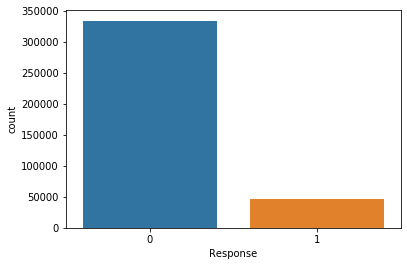

In [9]:
#response our target variable
sns.countplot(train_df.Response)

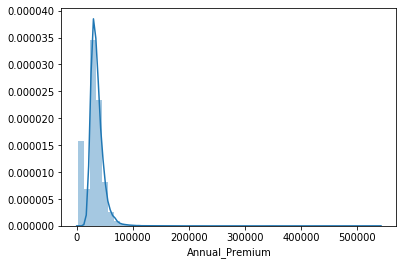

In [10]:
sns.distplot(train_df['Annual_Premium'])

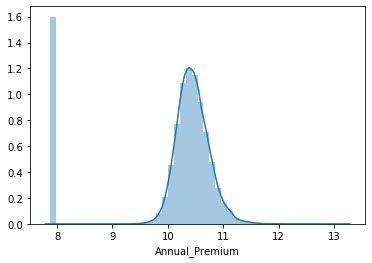

In [11]:
#Data is left Skewed as we can see from above distplot
train_df['Annual_Premium']=np.log(train_df['Annual_Premium'])
sns.distplot(train_df['Annual_Premium'])

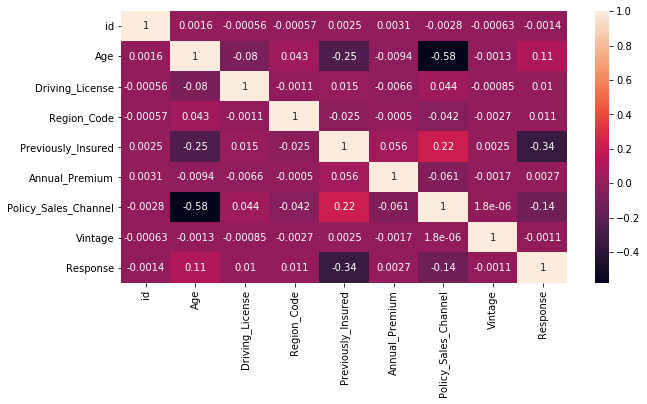

In [12]:
#see correlation
plt.figure(figsize=(10,5))
sns.heatmap(train_df.corr(),annot=True)

In [13]:
corr = train_df.corr()
corr = np.abs(corr)
corr['Response'].sort_values(ascending=False)

Response                1.000000
Previously_Insured      0.341170
Policy_Sales_Channel    0.139042
Age                     0.111147
Region_Code             0.010570
Driving_License         0.010155
Annual_Premium          0.002705
id                      0.001368
Vintage                 0.001050
Name: Response, dtype: float64

## Traet With Categorical Value

In [14]:
cat_feat = train_df.select_dtypes(include='object')
cat_feat.head()

,Gender,Vehicle_Age,Vehicle_Damage
0,Male,> 2 Years,Yes
1,Male,1-2 Year,No
2,Male,> 2 Years,Yes
3,Male,< 1 Year,No
4,Female,< 1 Year,No


In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [16]:
# lets encode the Gender
train_df['Gender']=le.fit_transform(train_df['Gender'])
train_df['Vehicle_Damage']=le.fit_transform(train_df['Vehicle_Damage'])

In [17]:
# lets encode the Vehicle_Damage
test_df['Gender']=le.fit_transform(test_df['Gender'])
test_df['Vehicle_Damage']=le.fit_transform(test_df['Vehicle_Damage'])

In [18]:
cat_feat = train_df.select_dtypes(include='object')
cat_feat.head()

,Vehicle_Age
0,> 2 Years
1,1-2 Year
2,> 2 Years
3,< 1 Year
4,< 1 Year


In [19]:
train_df['Vehicle_Age'].value_counts(1)*100

1-2 Year     52.561341
< 1 Year     43.238549
> 2 Years     4.200111
Name: Vehicle_Age, dtype: float64

In [20]:
# fe=train_df.groupby('Vehicle_Age').size()/len(train_df)
# train_df['Vehicle_Age']=train_df['Vehicle_Age'].apply(lambda x: fe[x])#can even try Label encoding or OHE
# test_df['Vehicle_Age']=test_df['Vehicle_Age'].apply(lambda x: fe[x])#can even try Label encoding or OHE

In [21]:
# lets encode the Vehicle_Age
# train['Vehicle_Age'] = train['Vehicle_Age'].replace(("1-2 Year", "< 1 Year","> 2 Years"),(1,0,2))
# test['Vehicle_Age'] = test['Vehicle_Age'].replace(("1-2 Year", "< 1 Year","> 2 Years"),(1,0,2))

In [22]:
train_df = pd.get_dummies(train_df, columns =['Vehicle_Age'],drop_first=True)
test_df = pd.get_dummies(test_df, columns =['Vehicle_Age'],drop_first=True)

In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     381109 non-null  int64  
 1   Gender                 381109 non-null  int32  
 2   Age                    381109 non-null  int64  
 3   Driving_License        381109 non-null  int64  
 4   Region_Code            381109 non-null  float64
 5   Previously_Insured     381109 non-null  int64  
 6   Vehicle_Damage         381109 non-null  int32  
 7   Annual_Premium         381109 non-null  float64
 8   Policy_Sales_Channel   381109 non-null  float64
 9   Vintage                381109 non-null  int64  
 10  Response               381109 non-null  int64  
 11  Vehicle_Age_< 1 Year   381109 non-null  uint8  
 12  Vehicle_Age_> 2 Years  381109 non-null  uint8  
dtypes: float64(3), int32(2), int64(6), uint8(2)
memory usage: 29.8 MB


In [24]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     127037 non-null  int64  
 1   Gender                 127037 non-null  int32  
 2   Age                    127037 non-null  int64  
 3   Driving_License        127037 non-null  int64  
 4   Region_Code            127037 non-null  float64
 5   Previously_Insured     127037 non-null  int64  
 6   Vehicle_Damage         127037 non-null  int32  
 7   Annual_Premium         127037 non-null  float64
 8   Policy_Sales_Channel   127037 non-null  float64
 9   Vintage                127037 non-null  int64  
 10  Vehicle_Age_< 1 Year   127037 non-null  uint8  
 11  Vehicle_Age_> 2 Years  127037 non-null  uint8  
dtypes: float64(3), int32(2), int64(5), uint8(2)
memory usage: 9.0 MB


In [25]:
corr = train_df.corr()
corr['Response'].sort_values(ascending=False)

Response                 1.000000
Vehicle_Damage           0.354400
Age                      0.111147
Vehicle_Age_> 2 Years    0.109300
Gender                   0.052440
Region_Code              0.010570
Driving_License          0.010155
Annual_Premium           0.002705
Vintage                 -0.001050
id                      -0.001368
Policy_Sales_Channel    -0.139042
Vehicle_Age_< 1 Year    -0.209878
Previously_Insured      -0.341170
Name: Response, dtype: float64

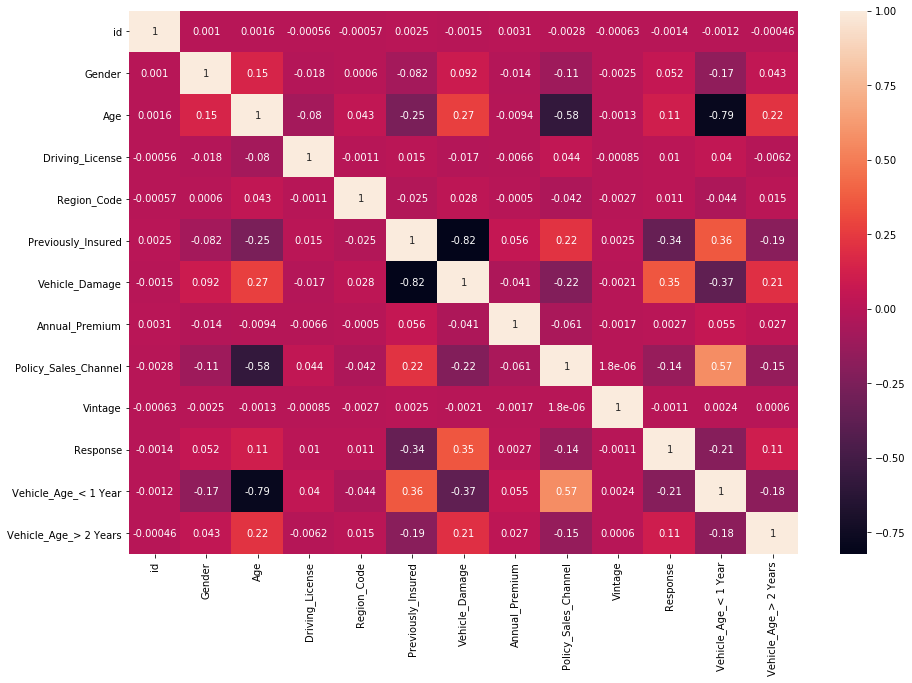

In [26]:
plt.subplots(figsize=(15,10))
sns.heatmap(corr,annot=True)

In [27]:
train_df = train_df.drop('id',axis=1)
test_df = test_df.drop('id',axis=1)

In [28]:
train_df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,44,1,28.0,0,1,10.607921,26.0,217,1,0,1
1,1,76,1,3.0,0,0,10.420375,26.0,183,0,0,0
2,1,47,1,28.0,0,1,10.553049,26.0,27,1,0,1
3,1,21,1,11.0,1,0,10.261826,152.0,203,0,1,0
4,0,29,1,41.0,1,0,10.221796,152.0,39,0,1,0


In [29]:
train_df.shape,test_df.shape

((381109, 12), (127037, 11))

In [30]:
#export
train_df.to_csv('data/train_cleaned.csv',index=False)
test_df.to_csv('data/test_cleaned.csv',index=False)

## Model Build

In [31]:
train = pd.read_csv('data/train_cleaned.csv')
test= pd.read_csv('data/test_cleaned.csv')

In [32]:
train.shape,test.shape

((381109, 12), (127037, 11))

In [33]:
# lets split the target data from the train data

y = train['Response']
x= train.drop(['Response'], axis = 1)
x_test = test

# lets print the shapes of these newly formed data sets
print("Shape of the x :", x.shape)
print("Shape of the y :", y.shape)
print("Shape of the x_test :", x_test.shape)

Shape of the x : (381109, 11)
Shape of the y : (381109,)
Shape of the x_test : (127037, 11)


In [34]:
x.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,44,1,28.0,0,1,10.607921,26.0,217,0,1
1,1,76,1,3.0,0,0,10.420375,26.0,183,0,0
2,1,47,1,28.0,0,1,10.553049,26.0,27,0,1
3,1,21,1,11.0,1,0,10.261826,152.0,203,1,0
4,0,29,1,41.0,1,0,10.221796,152.0,39,1,0


In [35]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 45)

# lets print the shapes again 
print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Valid :", x_valid.shape)
print("Shape of the y Valid :", y_valid.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the x Train : (304887, 11)
Shape of the y Train : (304887,)
Shape of the x Valid : (76222, 11)
Shape of the y Valid : (76222,)
Shape of the x Test : (127037, 11)


## LGBM MODEL

In [36]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

[LightGBM] [Warning] Unknown parameter: depth
Training Accuracy : 0.7107288929997015
Testing Accuracy : 0.7105822465954711


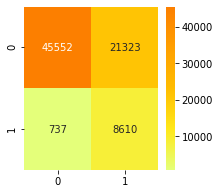

              precision    recall  f1-score   support

           0       0.98      0.68      0.81     66875
           1       0.29      0.92      0.44      9347

    accuracy                           0.71     76222
   macro avg       0.64      0.80      0.62     76222
weighted avg       0.90      0.71      0.76     76222



In [37]:
from lightgbm import LGBMClassifier
clf = LGBMClassifier(boosting_type='gbdt',n_estimators=300,depth=300,learning_rate=0.08,
                     objective='binary',
                     metric='auc',is_unbalance=True,
                    random_state=294,   colsample_bytree=0.2957523458101331, 
                     min_child_samples=10,
                   num_leaves=60, reg_alpha=10, reg_lambda=20,
                    subsample=0.1)

clf.fit(x_train,y_train)

y_pred = clf.predict(x_valid)

print("Training Accuracy :", clf.score(x_train, y_train))
print("Testing Accuracy :", clf.score(x_valid, y_valid))

cm = confusion_matrix(y_valid, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

cr = classification_report(y_valid, y_pred)
print(cr)

In [38]:
y_pred_proba = clf.predict_proba(x_valid)

In [39]:
y_pred_proba[:,1]

array([0.53256545, 0.00337851, 0.20047808, ..., 0.52323605, 0.00220308,
       0.56606098])

In [40]:
print(roc_auc_score(y_valid,y_pred_proba[:,1]))

0.8605997850277315


## Hyper Parameter

In [41]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
params={
'n_estimators': [100,200,250,300,350,450,500],
'depth':[100,200,300,500,600],
'num_leaves': [50,60,70,80,90], 
'min_child_samples': [10,15,20,30,50], 
'subsample': [0.06,0.07,0.08,0.10,0.12], 
'colsample_bytree': sp_uniform(loc=0.5, scale=0.20),
'reg_alpha': [10,20,30,40,50,60,70],
'reg_lambda': [ 10,15,20,25,30,35,45]
    
}

In [42]:

## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from lightgbm import LGBMClassifier

In [43]:

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [44]:
classifier=LGBMClassifier()

In [45]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [46]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(x_train,y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.3min finished


[LightGBM] [Warning] Unknown parameter: depth

 Time taken: 0 hours 2 minutes and 25.7 seconds.


In [47]:
random_search.best_score_

0.8568608008798737

In [48]:
random_search.best_estimator_

LGBMClassifier(colsample_bytree=0.6188026505766682, depth=200,
               min_child_samples=10, n_estimators=350, num_leaves=60,
               reg_alpha=30, reg_lambda=10, subsample=0.1)

In [49]:
model = random_search.best_estimator_

In [50]:
model.fit(x_train,y_train)

LGBMClassifier(colsample_bytree=0.6188026505766682, depth=200,
               min_child_samples=10, n_estimators=350, num_leaves=60,
               reg_alpha=30, reg_lambda=10, subsample=0.1)

Training Accuracy : 0.8778793454624172
Testing Accuracy : 0.8773976017422791


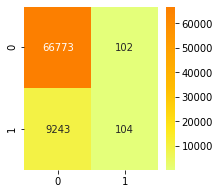

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66875
           1       0.50      0.01      0.02      9347

    accuracy                           0.88     76222
   macro avg       0.69      0.50      0.48     76222
weighted avg       0.83      0.88      0.82     76222



In [51]:
y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_valid, y_valid))

cm = confusion_matrix(y_valid, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

cr = classification_report(y_valid, y_pred)
print(cr)

In [52]:
y_pred_proba = model.predict_proba(x_valid)

In [53]:
print(roc_auc_score(y_valid,y_pred_proba[:,1]))

0.860717841798408


## Submission

In [73]:
pred_test =  np.array(clf.predict_proba(x_test)[:,1])

In [74]:
sub = pd.read_csv('data/sample_submission_iA3afxn.csv')
sub.head()

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0


In [75]:
sub['Response'] = pred_test 
sub.head()

,id,Response
0,381110,0.005643
1,381111,0.733757
2,381112,0.772685
3,381113,0.028321
4,381114,0.004373


In [76]:
sub['Response'].value_counts()

0.834864    14
0.836782    12
0.834405    11
0.777309    10
0.832750     9
            ..
0.005261     1
0.498001     1
0.035340     1
0.007947     1
0.005877     1
Name: Response, Length: 114859, dtype: int64

In [77]:
#sub.to_csv('lbgm44.csv',index=False)